# Credit Risk Analysis

## 1 - Research & Data Exploration

## Overview

***Objective***: The data used in this project is related to simulating credit bureau data. The aim of the project is to build and evaluate a classification model to predict whether an individual will default on their loan (y). In other words, whether or not they will make their re-payments on time. 

## Dataset Source

_The Dataset used for this analysis is obtained from the Kaggle (https://www.kaggle.com/) website. Details about the dataset can be found here:_***https://www.kaggle.com/datasets/laotse/credit-risk-dataset/code***

Dataset was accessed on: **31/10/2022**

**Why was the dataset choosen?**

## Exploratory Data Analysis

### <font color='green'>Load and Explore the Data</font>

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into a variable called credit
credit = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Print the number of rows and columns in the DataFrame
print(f'The dataset contains: {credit.shape[0]} observations and {credit.shape[1]} features.')

The dataset contains: 32581 observations and 12 features.


In [4]:
# Save the features into a variable called 'columns'
columns = credit.columns
# Inspect features
columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
# Number of unique values present in each column
for i in columns:
    print(i, '\t', len(credit[i].unique()))

person_age 	 58
person_income 	 4295
person_home_ownership 	 4
person_emp_length 	 37
loan_intent 	 6
loan_grade 	 7
loan_amnt 	 753
loan_int_rate 	 349
loan_status 	 2
loan_percent_income 	 77
cb_person_default_on_file 	 2
cb_person_cred_hist_length 	 29


In [6]:
# Inspect the first five rows of the dataset
credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
# Inspect data types and check for missing values in the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


<div class='alert alert-block alert-info'><u>Note:</u> Data types suggest a mixture of numeric and categorical features are present in the dataset!</div>

<div class='alert alert-block alert-info'><u>Note:</u> Varying column lengths suggest missing data is present in some of the columns!</div>

In [8]:
# Ratio of missing values in the data set
# Save the % of missing values for each feature in a Pandas Series in a descending order
credit_missing = pd.Series(data=[round(credit[i].isnull().sum() / len(credit) * 100, 2) for i in columns], index=columns)
credit_missing.sort_values(ascending=False)

loan_int_rate                 9.56
person_emp_length             2.75
person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

### <font color='green'>Class Distribution</font>

The target feature in the dataset that we are trying to predict: **loan_status**
The status of the loan is represented as a binary variable where:
> * **0** (False) &rarr; **Non-Default** (Loan re-payment successful)
> * **1** (True) &rarr; **Default** (Loan re-payment failed)

In [9]:
# Create a copy of the dataset for visualization
credit_copy = credit.copy()

# Change the values of the target variable to allow easier interpretation
credit_copy['loan_status'] = credit_copy['loan_status'].apply(lambda x: 'Default' if x == 1 else 'Non-Default')

In [10]:
credit_copy['loan_status'].describe()

count           32581
unique              2
top       Non-Default
freq            25473
Name: loan_status, dtype: object

In [11]:
# True (1) -> Default - Loan re-payment Failed, False (0) -> Non-Default - Loan re-payment Successful
credit_copy['loan_status'].value_counts()

Non-Default    25473
Default         7108
Name: loan_status, dtype: int64

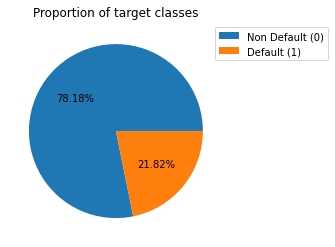

In [12]:
# Visualize class distribution proportions on a pie chart
plt.pie(credit_copy['loan_status'].value_counts(), autopct=lambda x: f'{round(x, 2)}%')
plt.title('Proportion of target classes')
plt.legend(['Non Default (0)', 'Default (1)'], 
           bbox_to_anchor=(1.5, 1), loc='upper right')
plt.show()

<div class='alert alert-block alert-info'> <u>Note:</u> The proportion for target variable classes suggests a mildly imbalanced dataset!</div>

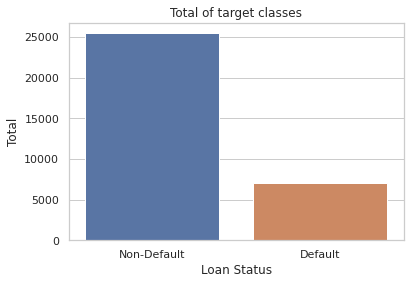

In [13]:
# Visualize total number for each class on a count plot
sns.set_theme(style='whitegrid')
sns.countplot(credit_copy, x=credit_copy['loan_status'], order=['Non-Default', 'Default'])
plt.title('Total of target classes')
plt.xlabel('Loan Status')
plt.ylabel('Total')
plt.show()

In [14]:
credit.groupby('loan_status').mean()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
loan_status,,,,,,,
0,27.807129,70804.361559,4.968745,9237.464178,10.435999,0.148805,5.837475
1,27.474676,49125.652223,4.137562,10850.502954,13.060207,0.246889,5.685003


_People who have a lower income (person_income), their loan amount would take a higer proportion of said income (loan_percent_income) are more likely to fail their loan re-payments_

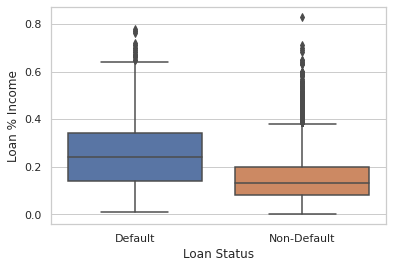

In [15]:
# Visualize the distribution of target classes based on the 'loan_percent_income' variable
sns.boxplot(credit_copy, x=credit_copy['loan_status'], y=credit_copy['loan_percent_income'])
plt.xlabel('Loan Status')
plt.ylabel('Loan % Income')
plt.show()

### <font color='green'>Quantitative Variables</font>

In [16]:
# Select quantitative features only and save the column names into a variable 
credit_num_cols = credit.select_dtypes(include=['number']).columns
credit_num_cols

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [17]:
# Check the proportion of quantitative features in the dataset
round(len(credit_num_cols) / len(credit.columns) * 100, 1)

66.7

In [18]:
# Display summary statistics for the Quantitative variables in the DataFrame
credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<div class='alert alert-block alert-info'> <u>Note:</u> Potential outliers for the age, income and employment length columns, which will be further investigated and dealt with if necessary at the pre-processing stage</div>

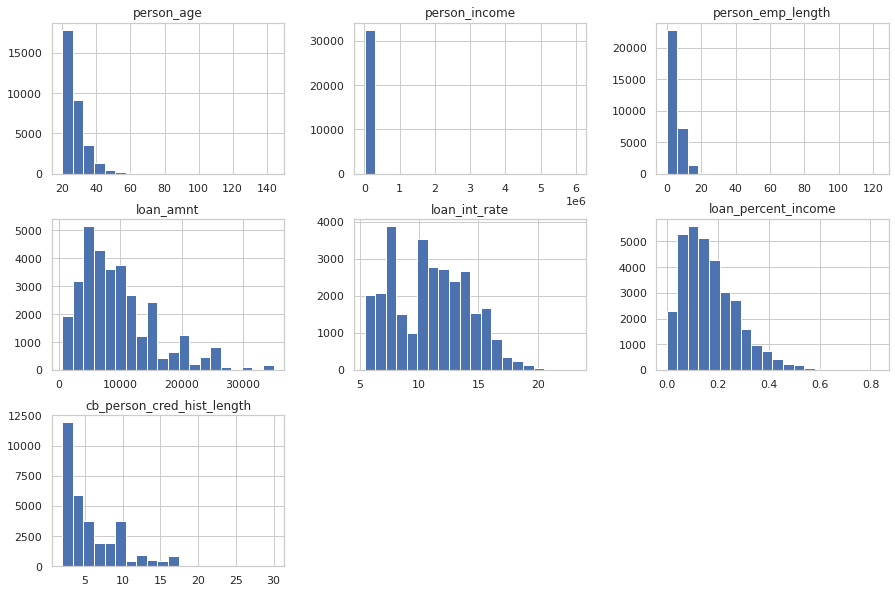

In [19]:
# Visualize numerical features on a histogram
credit[list(filter(lambda x: x != 'loan_status', credit_num_cols))].hist(bins=20, figsize=(15, 10))
plt.show()

In [20]:
# Generate correlation (Pearson's) matrix to gain more insight into the relationship between quantitative variables
# in the dataset 
corr_matrix = credit.corr().abs()
corr_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,0.021629,0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,0.144449,0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,0.056405,0.082489,0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,0.021629,0.144449,0.082489,0.105376,0.335133,1.000000,0.379366,0.015529
loan_percent_income,0.042411,0.254471,0.054111,0.572612,0.120314,0.379366,1.000000,0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,0.015529,0.031690,1.000000


In [21]:
# Inspect how the target variable correlates with other quantitative features in the dataset
corr_matrix['loan_status'].sort_values(ascending=False)[1:]

loan_percent_income           0.379366
loan_int_rate                 0.335133
person_income                 0.144449
loan_amnt                     0.105376
person_emp_length             0.082489
person_age                    0.021629
cb_person_cred_hist_length    0.015529
Name: loan_status, dtype: float64

[]

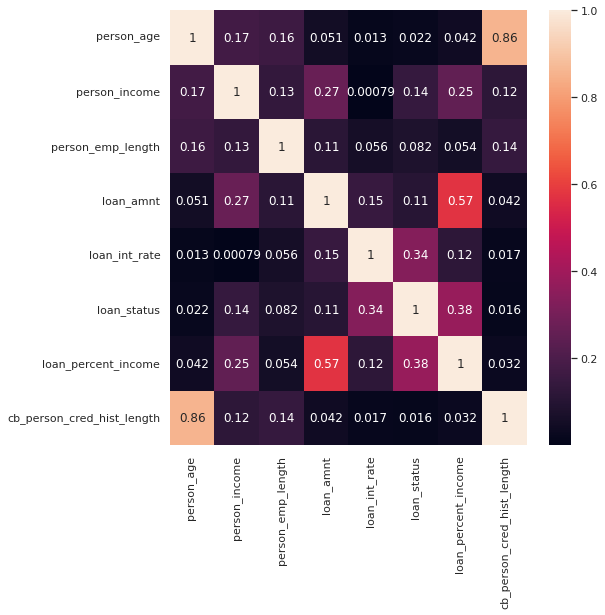

In [22]:
# Visualize the correlation matrix on a heatmap for better and easier interpretation of the relationships between
# each and every variable
ax = plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.plot()

### <font color='green'>Categorical Variables</font>

In [23]:
# Select only categorical variables from the DataFrame
credit_cat = credit.select_dtypes(include=['object'])
credit_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [24]:
# Get summary statistics for the categorical features representing (count, number of unique values, the mode and
# the frequency of the most common element)
credit_cat.describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [25]:
# Save the column names for categorical features into a variable
credit_cat_cols = credit_cat.columns
credit_cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [26]:
# Poroportion of categorical columns in the data set
round(len(credit_cat_cols) / len(credit.columns) * 100, 1)

33.3

In [27]:
# Check the unique values for each categorical feature
for col in credit_cat_cols:
    print(credit_cat[col].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
['D' 'B' 'C' 'A' 'E' 'F' 'G']
['Y' 'N']


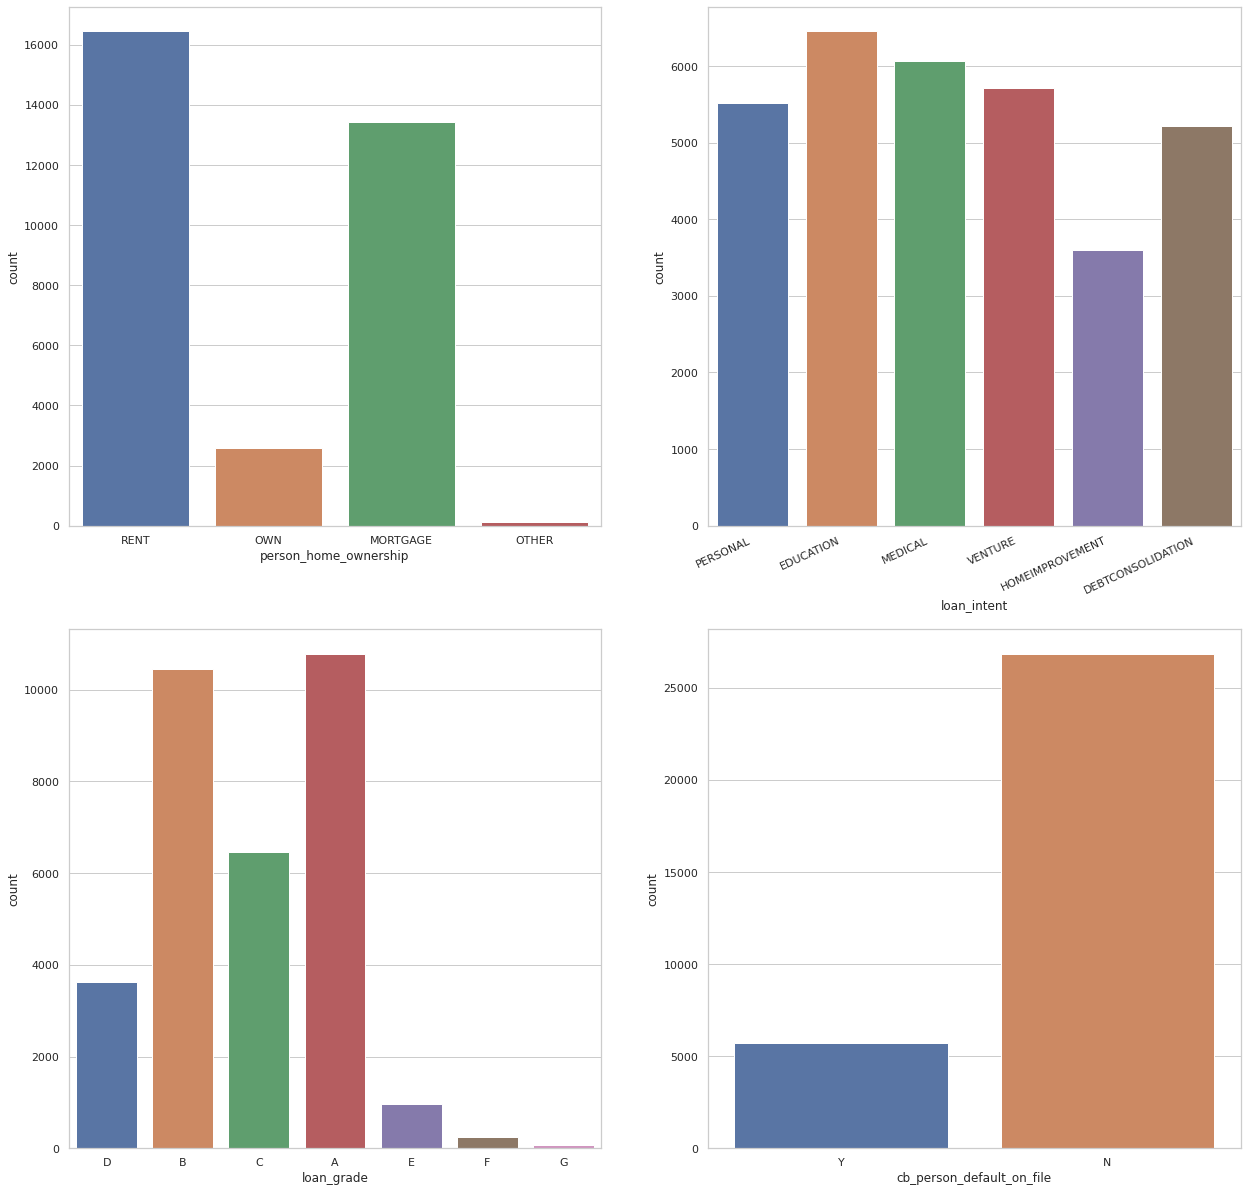

In [28]:
# Visualize the proportion of values for each categorical feature
plt.figure(figsize=(21, 21))
# plt.tight_layout()
for i in range(len(credit_cat_cols)):
    ax = plt.subplot(2, 2, i + 1)
    ax = sns.countplot(data=credit_cat, x=credit_cat[credit_cat_cols[i]])
    # To avoid overlapping labels for loan intent rotate labels to the right:
    if credit_cat_cols[i] == 'loan_intent':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')

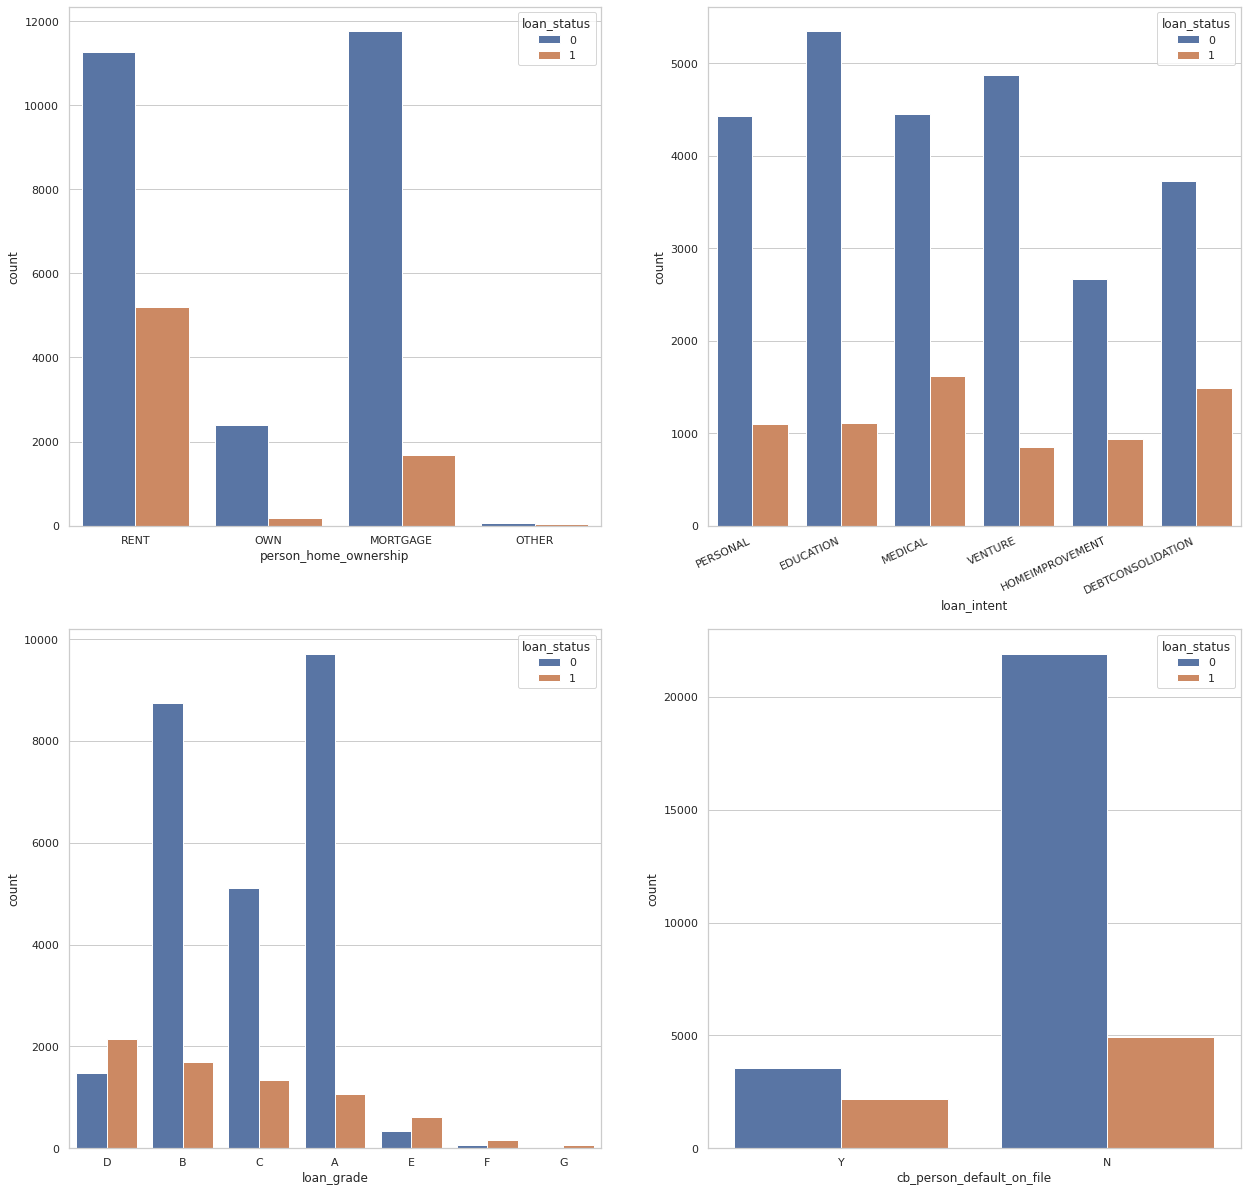

In [29]:
# Visualize the proportion of categorical values in terms of the target variable
plt.figure(figsize=(21, 21))
# plt.tight_layout()
for i in range(len(credit_cat_cols)):
    ax = plt.subplot(2, 2, i + 1)
    ax = sns.countplot(data=credit_cat, x=credit_cat[credit_cat_cols[i]], hue=credit['loan_status'])
    # To avoid overlapping labels for loan intent rotate labels to the right:
    if credit_cat_cols[i] == 'loan_intent':
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')

## Data Pre-processing

### <font color='green'>Handling Missing Values</font>

In [30]:
# Output the number of missing values where applicable along with the percentage of missing values compared to the 
# total number of values for the feature
credit_missing_cols = []  # Create a list to store columns with missing values
for col in columns:
    if (credit[col].isnull().sum() > 0):
        credit_missing_cols.append(col)  # Add the column name to the list
        print(f'Column name: {col}\nNumber of missing values: {credit[col].isnull().sum()}\nPercentage of missing values: {credit[col].isnull().sum() / len(credit) * 100}%\n')

Column name: person_emp_length
Number of missing values: 895
Percentage of missing values: 2.7469997851508547%

Column name: loan_int_rate
Number of missing values: 3116
Percentage of missing values: 9.563856235229121%



In [31]:
print(f'Columns with missing values: {credit_missing_cols}')

Columns with missing values: ['person_emp_length', 'loan_int_rate']


In [32]:
credit[['person_emp_length', 'loan_int_rate']]

,person_emp_length,loan_int_rate
0,123.0,16.02
1,5.0,11.14
2,1.0,12.87
3,4.0,15.23
4,8.0,14.27
...,...,...
32576,1.0,13.16
32577,4.0,7.49
32578,3.0,10.99
32579,5.0,11.48


In [33]:
credit[['person_emp_length', 'loan_int_rate']].describe()

,person_emp_length,loan_int_rate
count,31686.000000,29465.000000
mean,4.789686,11.011695
std,4.142630,3.240459
min,0.000000,5.420000
25%,2.000000,7.900000
50%,4.000000,10.990000
75%,7.000000,13.470000
max,123.000000,23.220000


In [34]:
corr_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,0.021629,0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,0.144449,0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,0.056405,0.082489,0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,0.021629,0.144449,0.082489,0.105376,0.335133,1.000000,0.379366,0.015529
loan_percent_income,0.042411,0.254471,0.054111,0.572612,0.120314,0.379366,1.000000,0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,0.015529,0.031690,1.000000


In [35]:
# Check how the features correlate with the target feature
corr_matrix['loan_status'].loc[['person_emp_length', 'loan_int_rate']]

person_emp_length    0.082489
loan_int_rate        0.335133
Name: loan_status, dtype: float64

In [36]:
# As shown above, there is almost no correlation between the employment length and the target variable, hence the
# observations with missing employment length value will be removed
credit.dropna(subset=['person_emp_length'], inplace=True)

In [37]:
credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3048
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [46]:
# The number of missing values for the employment length feature now is 0. As well the number of missing values for
# the interest rate has also decreased, meaning that there were observations who were missing both value.
# The interest rate feature is somewhat correlated with the target feature, however there are no apparent correlation
# between interest rate and other features, which means interest rate is specified using extraneous circumstances
# that are outside the scope of the dataset. Hence missing values for this feature will be filled with the most
# frequent value in the variable

# ! pip install scikit-learn
from sklearn.impute import SimpleImputer

imp_most_frequent = SimpleImputer(strategy='most_frequent')

credit = pd.DataFrame(imp_most_frequent.fit_transform(credit))
credit.columns = columns

# Alternative solution - transforming only the single feature after reshaping the column to a 2D np array
# credit['loan_int_rate'] = imp_most_frequent.fit_transform(credit['loan_int_rate'].values.reshape(-1, 1))


In [47]:
# Check if any missing values still remain in the dataset
credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### <font color='green'>Handling Outliers</font>

### <font color='green'>Encoding Categorical Variables</font>

In [40]:
# credit['cb_person_default_on_file'].replace(['Y', 'N'], [1, 0], inplace=True)